## Setup environment

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from monai.inferers import sliding_window_inference
from monai.transforms import Compose, Invertd, SaveImaged
from monai.data import decollate_batch
from src.utils import Config
from src.data_preparation import DataHandling, LoaderFactory
from src.vis import visualize_axial_slice, visualize_coronal_slice, model_visualize_coronal
from src.model_manager import ModelLoader
import json

In [2]:
config_file = 'src/config.json'
config = Config(config_file)

Requested device: cuda:0
CUDA is not available. Switching to CPU.


## Set dataset path

------
# FDG

In [ ]:

# from data_preparation import ExternalRadioSetHandling

# data_handler = ExternalRadioSetHandling(data_dir=fdg_data_dir, test_ratio=0.2)
# train, valid, test_files = data_handler.get_split_data()

# print(f"Test data length: {len(test_files)}")

# # To access 'image' keys, iterate through the list
# image_files = [file_info['image'] for file_info in test_files]
# target_files = [file_info['target'] for file_info in test_files]
# print(len(image_files))

-------------
# Ga

In [ ]:

# from data_preparation import DataHandling 

# data_handler = DataHandling(ga_data_dir, train_mode="NAC", target_mode="MAC")

# train_files = data_handler.get_data_split('train')
# val_files = data_handler.get_data_split('val')
# test_files = data_handler.get_data_split('test')
# print(len(train_files))
# print(len(val_files))
# print(len(test_files))

# from data_preparation import LoaderFactory
# loader_factory = LoaderFactory(
#     train_files=None,
#     val_files=None,
#     test_files=test_files,
#     patch_size = [168, 168, 16],
#     spacing = [4.07, 4.07, 3.00],
#     # spacing = [1.92, 1.92, 3.27], # For fdg data
#     spatial_size = (168, 168, 400)
#     # spatial_size = (336, 336, 640) # for Fdg data
#     )

# test_loader = loader_factory.get_loader('test', batch_size=1, num_workers=2, shuffle=False)

--------
# Ga-Artifact

In [3]:
data_handler = DataHandling(
    config.artifact_dir,
    train_mode=config.train_mode,
    target_mode=config.target_mode,
    external_centers=config.external_centers,
    train_percent=config.train_percent,
    val_percent=config.val_percent,
    test_percent=config.test_percent
    )


test_files = data_handler.get_data_split('test')


loader_factory = LoaderFactory(
    train_files=_,
    val_files=_,
    test_files=test_files,
    patch_size=config.patch_size,
    spacing=config.spacing,
    spatial_size=config.spatial_size,
    normalize=config.normalize
    )


# Get the DataLoader for each dataset type
test_loader = loader_factory.get_loader('test', batch_size=config.batch_size['test'], num_workers=config.num_workers['test'], shuffle=False)


Number of training files: 0
Number of validation files: 0
Number of test files: 191


---------
# Corrected Artifactual Images

In [4]:

log_filename = '/students/2023-2024/master/Shahpouri/DL_PET/Results/log_4_17_19_29.txt'  # Ga, new structure. editesh kardam payini ro ezaf kardam behesh.

bestmodel_filename =  '/students/2023-2024/master/Shahpouri/DL_PET/Results/model_4_24_23_17.pth'
best_metric = 0.0527
best_epoch = 434

In [5]:
# Searching for model.
model_path =  'Results/model_4_24_23_17.pth'
model_loader = ModelLoader(config)
model = model_loader.call_model()

Starting a dynunet model training.


In [6]:
import torch

# Assuming root_dir is the directory where your model files are stored
model_path = os.path.join(config.log_dir, bestmodel_filename)
if os.path.exists(model_path):
    print(f"Model file {bestmodel_filename} is loading.")
    model.load_state_dict(torch.load(model_path))
    model.eval()
else:
    print(f"Model file {bestmodel_filename} not found.")

Model file /students/2023-2024/master/Shahpouri/DL_PET/Results/model_4_24_23_17.pth is loading.


# Exporting DL image using the model

In [7]:

# from monai.inferers import sliding_window_inference
# import matplotlib.pyplot as plt
# import numpy as np
# from monai.transforms import Compose, Invertd, SaveImaged
# from monai.data import decollate_batch


# roi_size = (168, 168, 16)
# sw_batch_size = 64


# post_transforms = Compose(
#     [
#         Invertd(
#             keys="pred",
#             transform=loader_factory.get_test_transforms(),
#             orig_keys="image",
#             meta_keys="pred_meta_dict",
#             orig_meta_keys="image_meta_dict",
#             meta_key_postfix="meta_dict",
#             nearest_interp=False,
#             to_tensor=True,
#         ),
#         # ClampNegative(keys=["pred"]),
#         SaveImaged(keys="pred", meta_keys="pred_meta_dict", output_dir=config.artifact_output_dir, output_postfix="dl4_23", resample=False), 
#     ]
# )
# # comb_3_27_onfdg_v2 fdg_output_dir
# # dl4_23 ga_output_dir
# # comb_4_5_onfdg fdg_output_dir

# with torch.no_grad():
#     for test_data in test_loader:
#         test_inputs = test_data["image"].to(config.device)
#         test_data["pred"] = sliding_window_inference(test_inputs, roi_size, sw_batch_size, model, overlap=0.90)
#         post_processed = [post_transforms(i) for i in decollate_batch(test_data)]



2024-08-06 12:20:57,225 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001040_C1_RZ_/001040_C1_RZ__dl4_23.nii.gz
2024-08-06 12:21:27,979 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001418_C1_RZ_/001418_C1_RZ__dl4_23.nii.gz
2024-08-06 12:21:58,960 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001419_C1_RZ_/001419_C1_RZ__dl4_23.nii.gz
2024-08-06 12:22:28,992 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001434_C1_RZ_/001434_C1_RZ__dl4_23.nii.gz
2024-08-06 12:22:59,179 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001447_C1_RZ_/001447_C1_RZ__dl4_23.nii.gz
2024-08-06 12:23:29,044 INFO image_writer.py:197 - writing: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001453_C1_RZ_/001453_C1_RZ__dl4_23.nii.gz
2024-08-06 12:24:00,602 INFO

-----------------
# Saving pair data pathes as dataframes

In [4]:
# hint = "dl_final_3_29"
# hint = 'gamodel_3_18_onfdg'
# hint = 'dl4_23'
hint = 'final_4_26'
# hint = 'comb_4_5_onfdg'

In [20]:
# import nibabel as nib
# import pandas as pd


# # Get the DataLoader for each dataset type
# test_loader = loader_factory.get_loader('test', batch_size=config.batch_size['test'], num_workers=config.num_workers['test'], shuffle=False)
# test_name = [(os.path.splitext(os.path.basename(file_info['image']))[0], os.path.splitext(os.path.basename(file_info['target']))[0]) for file_info in test_files]

# image_files = [file_info['image'] for file_info in test_files]
# target_files = [file_info['target'] for file_info in test_files]

# # Create a list of dictionaries containing the patient data
# patient_data = [{
#     'name': os.path.splitext(name_pair[0])[0],
#     'image': image_path,
#     'target': target_path
# } for name_pair, image_path, target_path in zip(test_name, image_files, target_files)]

# # Create a DataFrame from the list of dictionaries
# df = pd.DataFrame(patient_data)
# df.to_csv('Results/DF_artifacts_pathes.csv', index=False)


# Getting image matric

In [22]:
from src.utils import ImageProcessor
import pandas as pd

df_artifacts_pathes = pd.read_csv('Results/DF_artifacts_pathes.csv')
hint = 'dl4_23'  # Replace with the actual hint
n = 85  # You can choose any valid slice index
processor = ImageProcessor(config.artifact_output_dir, config.nac_factor_ga, config.mac_factor_ga, hint)

df = processor.load_and_store_images_to_df(df_artifacts_pathes, test_files)

Searching for DL image with pattern: /students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/**/001040_C1_RZ_*dl4_23.nii.gz
All files in directory: ['/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/003315_C3_KH_', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/003315_C3_KH_/003315_C3_KH__dl4_23.nii.gz', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/007033_C5_RJ_', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/007033_C5_RJ_/007033_C5_RJ__dl4_23.nii.gz', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001681_C1_RZ_', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/001681_C1_RZ_/001681_C1_RZ__dl4_23.nii.gz', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/002410_C2_IM_', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__TOTAL/002410_C2_IM_/002410_C2_IM__dl4_23.nii.gz', '/students/2023-2024/master/Shahpouri/ARTIFACT_OUTPUT__

# Plotting

In [102]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n, cmp="gray"):
    """
    Display medical images for a patient: input, target, deep learning output, and the difference.
    """
    # Define a continuous colormap
    colors = [(0.00, "red"), (0.40, "white"), (0.8, "white"), (1.00, "blue")]
    cmap_name = 'custom_seismic'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    fig, axs = plt.subplots(1, 4, figsize=(8, 4), gridspec_kw={'wspace':0.3, 'hspace':0})

    # Turn off axes
    for ax in axs:
        ax.axis('off')

    # Configure vmin and vmax for each image type
    nac_display_range = (np.percentile(image, 0), np.percentile(image, 99.9))
    mac_display_range = (np.percentile(target, 0), np.percentile(target, 99.9))
    dl_display_range = (np.percentile(dl_image, 0), np.percentile(dl_image, 99.9))

# Font properties
    font_properties = {'fontsize': 10, 'family': 'Liberation Sans'}

    # Input Image
    input_slice = np.rot90(image[:, n, :])
    im0 = axs[0].imshow(input_slice, cmap=cmp, vmin=nac_display_range[0], vmax=nac_display_range[1])
    cbar0 = fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04, format='%.1f')
    cbar0.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)

    # Target Image
    target_slice = np.rot90(target[:, n, :])
    im1 = axs[1].imshow(target_slice, cmap=cmp, vmin=mac_display_range[0], vmax=mac_display_range[1])
    cbar1 = fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)
    cbar1.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)

    # DL Image
    dl_slice = np.rot90(dl_image[:, n, :])
    im2 = axs[2].imshow(dl_slice, cmap=cmp, vmin=dl_display_range[0], vmax=dl_display_range[1])
    cbar2 = fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
    cbar2.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)

    # Difference Image
    difference_slice = np.rot90(difference_image[:, n, :])
    im3 = axs[3].imshow(difference_slice, cmap=cm, vmin=-1, vmax=1)
    cbar3 = fig.colorbar(im3, ax=axs[3], fraction=0.046, pad=0.04)
    cbar3.set_label('Difference', labelpad=-20, y=1.3, rotation=0, **font_properties)
    cbar3.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()


In [115]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n, cmp="gray"):
    """
    Display medical images for a patient: input, target, deep learning output, and the difference.
    """
    # Define a continuous colormap
    colors = [(0.00, "red"), (0.40, "white"), (0.8, "white"), (1.00, "blue")]
    cmap_name = 'custom_seismic'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    fig, axs = plt.subplots(1, 4, figsize=(8, 4), gridspec_kw={'wspace': 0.3, 'hspace': 0})

    # Turn off axes
    for ax in axs:
        ax.axis('off')

    # Configure vmin and vmax for each image type
    nac_display_range = (np.percentile(image, 0), np.percentile(image, 99.8))
    mac_display_range = (np.percentile(target, 0), np.percentile(target, 99.8))
    dl_display_range = (np.percentile(dl_image, 0), np.percentile(dl_image, 99.8))

    # Font properties
    font_properties = {'fontsize': 10, 'family': 'Liberation Sans'}

    # Input Image
    input_slice = np.rot90(image[:, n, :])
    im0 = axs[0].imshow(input_slice, cmap=cmp, vmin=nac_display_range[0], vmax=nac_display_range[1])
    cbar0 = fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04, format='%.1f')
    cbar0.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)
    cbar0.set_ticks([nac_display_range[0], nac_display_range[1]])

    # Target Image
    target_slice = np.rot90(target[:, n, :])
    im1 = axs[1].imshow(target_slice, cmap=cmp, vmin=mac_display_range[0], vmax=mac_display_range[1])
    cbar1 = fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)
    cbar1.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)
    cbar1.set_ticks([mac_display_range[0], mac_display_range[1]])
    cbar1.ax.yaxis.set_major_formatter('{:.0f}'.format)
    # DL Image
    dl_slice = np.rot90(dl_image[:, n, :])
    im2 = axs[2].imshow(dl_slice, cmap=cmp, vmin=dl_display_range[0], vmax=dl_display_range[1])
    cbar2 = fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)
    cbar2.set_label('SUV', labelpad=-20, y=1.3, rotation=0, **font_properties)
    cbar2.set_ticks([dl_display_range[0], dl_display_range[1]])
    cbar2.ax.yaxis.set_major_formatter('{:.0f}'.format)

    # Difference Image
    difference_slice = np.rot90(difference_image[:, n, :])
    im3 = axs[3].imshow(difference_slice, cmap=cm, vmin=-1, vmax=1)
    cbar3 = fig.colorbar(im3, ax=axs[3], fraction=0.046, pad=0.04)
    cbar3.set_label('Difference', labelpad=-20, y=1.3, rotation=0, **font_properties)
    cbar3.set_ticks([-1, 0, 1])

    plt.show()



001040_C1_RZ_


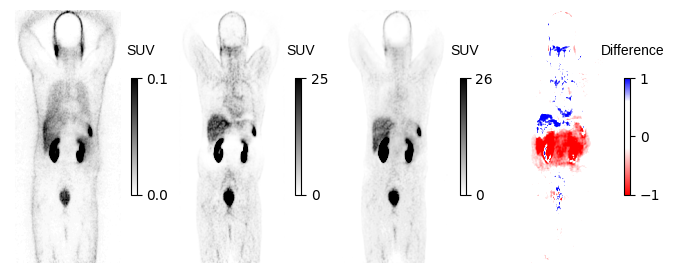

001418_C1_RZ_


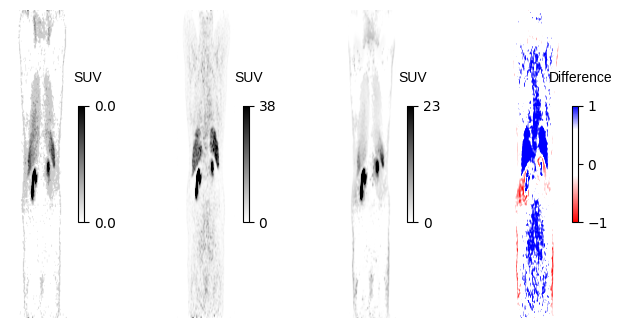

001419_C1_RZ_


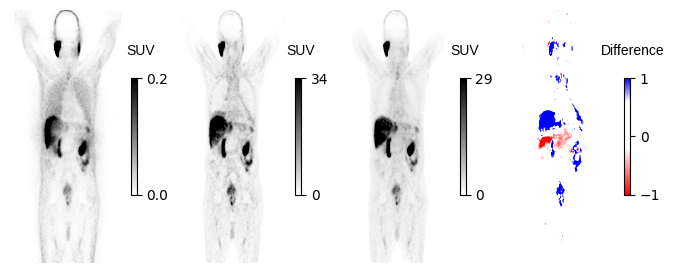

001434_C1_RZ_


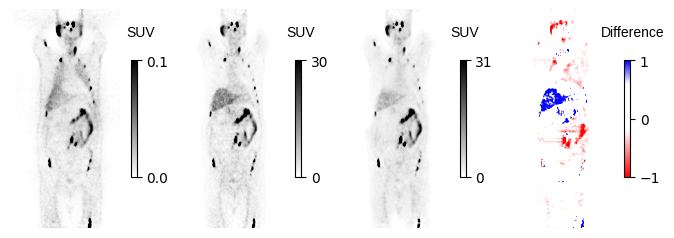

001447_C1_RZ_


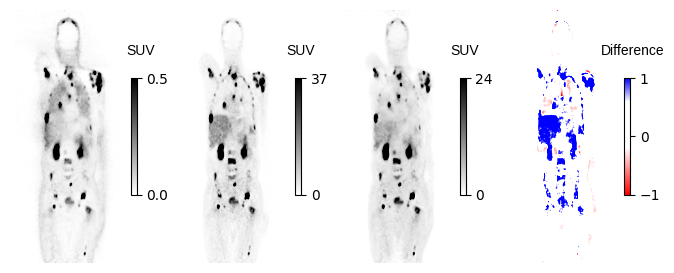

In [116]:
# from src.vis import display_patient_transverse, display_patient_coronal
# Now you can use the data from the DataFrame to display the images as needed
i = 1
for index, row in df.iterrows():
    if row['dl_image_path'] is None:
        print(f"No DL image found for {row['name']}")
        continue

    image = row['image_matrix']
    target = row['target_matrix']
    dl_image = row['dl_image_matrix']
    difference_image = row['difference_matrices']

    n = 85  # or whatever slice index you want to use
    print(row['name'])
    display_patient_coronal(row['name'], image, target, dl_image, difference_image, n, cmp="gist_yarg")
    i += 1
    if i == 6:
        break


In [ ]:
from src.utils import find_dl_image_path, normalize_data
from src.vis import display_patient_coronal
import nibabel as nib

hint = 'dl4_23'
nac_factor=2
mac_factor=5

i = 1
for file_info, name_pair in zip(test_files, test_name):
    image_path = file_info['image']
    target_path = file_info['target']
    patient_folder_name_image, _ = name_pair

    dl_image_path = find_dl_image_path(config.artifact_output_dir, patient_folder_name_image, hint)
    if dl_image_path is None:
        print(f"No DL image found for {patient_folder_name_image}")
        continue

    # image = normalize_data(nib.load(image_path).get_fdata())
    # target = normalize_data(nib.load(target_path).get_fdata())
    # dl_image = normalize_data(nib.load(dl_image_path).get_fdata())

    image = (nib.load(image_path).get_fdata()) * nac_factor
    target = (nib.load(target_path).get_fdata()) * mac_factor
    dl_image = (nib.load(dl_image_path).get_fdata()) * mac_factor
    difference_image = (target - dl_image) / mac_factor
    # print(np.max(difference_image), np.min(difference_image))
    difference_image = np.clip(difference_image, -1, 1)

    
    n = 101
    n = 85
    
    # n = 85
    # n = 90
    # n = 108
    # n = 100
    # n = 125
    
    display_patient_coronal(patient_folder_name_image, image, target, dl_image, difference_image, n, cmp ="gist_yarg")
    i +=1
    if i == 2:
        break

    # n = 117
    # n = 198
    # n = 74
    # n = 52
    # n = 62
    # n = 48
    # n = 97

    # display_patient_transverse(patient_folder_name_image, image, target, dl_image, difference_image, n, cmp ="gist_yarg")
    # # # i +=1
    # # # if i == 4:
    # # #     break
    
# vmin=0, vmax=0.5, vmin=0, vmax=5

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
def display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n, cmp="gray"):
    """
    Display medical images for a patient: input, target, deep learning output, and the difference.
    """
    colors = [(0.00, "orange"), (0.40, "white"), (0.8, "white"), (1.00, "blue")]
    cmap_name = 'custom_seismic_more_white'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=12)

    fig, axs = plt.subplots(1, 4, figsize=(8, 4), gridspec_kw={'wspace':0, 'hspace':0})

    # Turn off axes
    for ax in axs:
        ax.axis('off')

    # Configure vmin and vmax for each image type
    nac_display_range = (np.percentile(image, 0), np.percentile(image, 99.9))
    mac_display_range = (np.percentile(target, 0), np.percentile(target, 99.9))
    dl_display_range = (np.percentile(dl_image, 0), np.percentile(dl_image, 99.9))

    # Input Image

    input_slice = np.rot90(image[:, n, :])
    axs[0].imshow(input_slice, cmap=cmp, vmin=nac_display_range[0], vmax=nac_display_range[1])

    # Target Image
    axs[1].set_title(patient_folder_name)
    target_slice = np.rot90(target[:, n, :])
    axs[1].imshow(target_slice, cmap=cmp, vmin=mac_display_range[0], vmax=mac_display_range[1])

    # DL Image
 
    dl_slice = np.rot90(dl_image[:, n, ])
    axs[2].imshow(dl_slice, cmap=cmp, vmin=dl_display_range[0], vmax=dl_display_range[1])

    # Difference Image

    difference_slice = np.rot90(difference_image[:, n, :])
    axs[3].imshow(difference_slice, cmap=cm, vmin=-1, vmax=1)


    plt.show()


In [ ]:
# from matplotlib.colors import LinearSegmentedColormap
# import matplotlib.pyplot as plt
# import numpy as np

# def display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n, cmp="gray"):
#     """
#     Display medical images for a patient: input, target, deep learning output, and the difference.
#     """
#     colors = [(0.00, "red"), (0.40, "white"), (0.80, "white"), (1.00, "blue")]
#     cmap_name = 'custom_seismic_more_white'
#     cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=12)

#     fig, axs = plt.subplots(1, 4, figsize=(12, 6), gridspec_kw={'wspace': 0, 'hspace': 0})
#     cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])

#     # Turn off axes
#     for ax in axs:
#         ax.axis('off')

#     # Configure vmin and vmax for each image type
#     nac_display_range = (np.percentile(image, 0), np.percentile(image, 99.9))
#     mac_display_range = (np.percentile(target, 0), np.percentile(target, 99.9))
#     dl_display_range = (np.percentile(dl_image, 0), np.percentile(dl_image, 99.9))

#     # Input Image
#     input_slice = np.rot90(image[:, n, :])
#     im = axs[0].imshow(input_slice, cmap=cmp, vmin=nac_display_range[0], vmax=nac_display_range[1])

#     # Target Image
#     axs[1].set_title(patient_folder_name)
#     target_slice = np.rot90(target[:, n, :])
#     axs[1].imshow(target_slice, cmap=cmp, vmin=mac_display_range[0], vmax=mac_display_range[1])

#     # DL Image
#     dl_slice = np.rot90(dl_image[:, n, :])
#     axs[2].imshow(dl_slice, cmap=cmp, vmin=dl_display_range[0], vmax=dl_display_range[1])

#     # Difference Image
#     difference_slice = np.rot90(difference_image[:, n, :])
#     im_diff = axs[3].imshow(difference_slice, cmap=cm, vmin=-1, vmax=1)

#     # Add colorbars
#     fig.colorbar(im, ax=axs[0], orientation='vertical')
#     fig.colorbar(im, ax=axs[1], orientation='vertical')
#     fig.colorbar(im, ax=axs[2], orientation='vertical')
#     fig.colorbar(im_diff, ax=axs[3], orientation='vertical')

#     plt.show()


# n = 50

# display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n)


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

def display_patient_coronal(patient_folder_name, image, target, dl_image, difference_image, n, cmp="gray"):
    """
    Display medical images for a patient: input, target, deep learning output, and the difference.
    """
    colors = [(0.00, "orange"), (0.40, "white"), (0.8, "white"), (1.00, "blue")]
    cmap_name = 'custom_seismic_more_white'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=12)

    fig, axs = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={'wspace':0.3, 'hspace':0})

    # Turn off axes
    for ax in axs:
        ax.axis('off')

    # Configure vmin and vmax for each image type
    nac_display_range = (np.percentile(image, 0), np.percentile(image, 99.9))
    mac_display_range = (np.percentile(target, 0), np.percentile(target, 99.9))
    dl_display_range = (np.percentile(dl_image, 0), np.percentile(dl_image, 99.9))

    # Input Image
    input_slice = np.rot90(image[:, n, :])
    im0 = axs[0].imshow(input_slice, cmap=cmp, vmin=nac_display_range[0], vmax=nac_display_range[1])
    fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

    # Target Image
    axs[1].set_title(patient_folder_name)
    target_slice = np.rot90(target[:, n, :])
    im1 = axs[1].imshow(target_slice, cmap=cmp, vmin=mac_display_range[0], vmax=mac_display_range[1])
    fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

    # DL Image
    dl_slice = np.rot90(dl_image[:, n, :])
    im2 = axs[2].imshow(dl_slice, cmap=cmp, vmin=dl_display_range[0], vmax=dl_display_range[1])
    fig.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)

    # Difference Image
    difference_slice = np.rot90(difference_image[:, n, :])
    im3 = axs[3].imshow(difference_slice, cmap=cm, vmin=-1, vmax=1)
    fig.colorbar(im3, ax=axs[3], fraction=0.046, pad=0.04)

    plt.show()



In [ ]:
from utils import find_dl_image_path, normalize_data
# from vis import display_patient_coronal


hint = "dl_final_3_29"
hint = 'gamodel_3_18_onfdg'
hint = 'dl4_23'
hint = 'adcm_4_26'
hint = "final_4_26"
hint = 'comb_4_5_onfdg'
nac_factor=3
mac_factor=7

i = 1
for file_info, name_pair in zip(test_files, test_name):
    image_path = file_info['image']
    target_path = file_info['target']
    patient_folder_name_image, _ = name_pair

    dl_image_path = find_dl_image_path(fdg_output_dir, patient_folder_name_image, hint)
    if dl_image_path is None:
        print(f"No DL image found for {patient_folder_name_image}")
        continue

    # image = normalize_data(nib.load(image_path).get_fdata())
    # target = normalize_data(nib.load(target_path).get_fdata())
    # dl_image = normalize_data(nib.load(dl_image_path).get_fdata())

    image = (nib.load(image_path).get_fdata()) * nac_factor
    target = (nib.load(target_path).get_fdata()) * mac_factor
    dl_image = (nib.load(dl_image_path).get_fdata()) * mac_factor
    difference_image = (target - dl_image) 
    # print(np.max(difference_image), np.min(difference_image))
    difference_image = np.clip(difference_image, -1, 1)


    n = 90
    # n = 85
    # n = 90
    # n = 108
    # n = 100
    # n = 115
    
    display_patient_coronal(patient_folder_name_image, image, target, dl_image, difference_image, n, cmp ="jet")
    # i +=1
    # if i == 20:
    #     break


In [ ]:
# import nibabel as nib
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import glob
# from matplotlib.colors import LinearSegmentedColormap
# import numpy as np
# import matplotlib.pyplot as plt

# def apply_window(image, window_level, window_width):
#     """
#     Apply window level and width to an image.

#     Parameters:
#     - image: The input image as a NumPy array.
#     - window_level (WL): The center of the range of interest.
#     - window_width (WW): The width of the range of interest.

#     Returns:
#     - The windowed image.
#     """
#     lower_bound = window_level - window_width / 2
#     upper_bound = window_level + window_width / 2
#     windowed_image = np.clip(image, lower_bound, upper_bound)
#     windowed_image = (windowed_image - lower_bound) / window_width
#     return windowed_image

# window_level = 0  # Example values
# window_width = 1  # Example values

# hint = "dl3_18"

# # Function to find the DL image path for a given patient folder name
# def find_dl_image_path(patient_folder_name):
#     # Construct a glob pattern to search for DL images with the matching patient folder name
#     search_pattern = os.path.join(artifact_output, "**", f"{patient_folder_name}*{hint}.nii.gz")
#     found_paths = glob.glob(search_pattern, recursive=True)
#     if found_paths:
#         return found_paths[0]  # Return the first match
#     else:
#         return None  # No match found

# def normalize_data(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))
# cmap = LinearSegmentedColormap.from_list(
#     'bwr', 
#     # ['purple', 'purple','darkviolet','white','white', 'lime', 'limegreen','limegreen']
#     ['purple','white','limegreen']
#     # ['purple', 'purple','purple','white','white', 'limegreen', 'limegreen','limegreen']
#     #['red', 'red','orangered','white','white', 'royalblue', 'blue','blue']
#     #['red', 'red','red','white','white', 'blue', 'blue','blue']
#     # ['red', 'red','red','tomato','white','white' , 'dodgerblue', 'blue', 'blue', 'blue']
# )
# # Loop over each file pair, find the matching DL image, and plot them
# for file_info, name_pair in zip(test_files, test_name):
#     image_path = file_info['image']
#     target_path = file_info['target']
#     patient_folder_name_image, _ = name_pair

#     dl_image_path = find_dl_image_path(patient_folder_name_image)
#     if dl_image_path is None:
#         print(f"No DL image found for {patient_folder_name_image}")
#         continue

#     # Load and normalize images
#     image = normalize_data(nib.load(image_path).get_fdata())
#     target = normalize_data(nib.load(target_path).get_fdata())
#     dl_image = normalize_data(nib.load(dl_image_path).get_fdata())
#     windowed_image = apply_window(image, window_level, window_width)
#     # Calculate the difference image and normalize to range -1 to 1
#     difference_image = target - dl_image
#     # difference_image = np.clip(difference_image, -1, 1)  # Ensure the difference is within -1 to 1

#     # difference_image = 2 * (difference_image - np.min(difference_image)) / (np.max(difference_image) - np.min(difference_image)) - 1

#     # image = nib.load(image_path).get_fdata()
#     # target = nib.load(target_path).get_fdata()
#     # dl_image = nib.load(dl_image_path).get_fdata()
#     # difference_image = target - dl_image
#     # # difference_image = np.clip(difference_image, -1, 1)  # Ensure the difference is within -1 to 1
#     n = 94

#     fig, axs = plt.subplots(1, 4, figsize=(20, 6))

#     plt.subplot(1, 4, 1)
#     plt.title(f"Input: {patient_folder_name_image}")
#     input_slice = np.rot90(image[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     plt.subplot(1, 4, 2)
#     plt.title("Target")
#     input_slice = np.rot90(target[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     plt.subplot(1, 4, 3)
#     plt.title("DL Image")
#     input_slice = np.rot90(dl_image[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     ax = plt.subplot(1, 4, 4)
#     plt.subplot(1, 4, 4)
#     plt.title("Difference")
#     # Using a diverging colormap to highlight differences
#     difference_display = plt.imshow(np.rot90(difference_image[:, n, :]), cmap=cmap, vmin=-0.1, vmax=0.1) # vmin=-np.max(np.abs(difference_image)), vmax=np.max(np.abs(difference_image)))
#     plt.axis('off')
#     fig.colorbar(difference_display, ax=axs[3])

#     plt.tight_layout()
#     plt.show()
#     # break
